Fragoso Alvarado Daniel | 316049054

----

# Introducción

La gestión de la calidad del aire es un área importante e influye en muchas decisiones que toman los países. Pero, ¿Cómo se determina la calidad del aire de un lugar? Esto se hace calculando el Factor de Emisiones de esa área. ¿Qué es el factor de emisión? Muchas actividades hoy en día dan como resultado la liberación de gases de efecto invernadero (GEI) en la atmósfera. Existen diversas actividades que contribuyen a la liberación de GEI como la quema de combustibles, vehículos, Centrales Eléctricas, etc. Por lo tanto, para estimar las emisiones de GEI por unidad de actividad disponible, necesitamos utilizar un factor denominado factor de emisión (FE). Por ejemplo: $¿$ Cuántos kilogramos de GEI se emiten por $1 \mathrm{kWh}$ (Kilowatt-hora) de gas natural? Así, un factor de emisión es un coeficiente que convierte los datos de cualquier actividad en emisiones de GEI. Este factor intenta relacionar la cantidad de un contaminante liberado a la atmósfera con una actividad asociada con la liberación de ese contaminante.

# Desarrollo

Para esta Tarea vamos a utilizar la Base de Datos Global de Plantas de Energía que incluye detalles de plantas de energía en todo el mundo.

https://datasets.wri.org/dataset/globalpowerplantdatabase

La base de datos cubre aproximadamente 30,000 centrales eléctricas de 164 países e incluye centrales térmicas y de energías renovables.

# Actividades

Explore la Base de Datos Global de Plantas de Energia para Puerto Rico, para ello utilice el dataset gppd_120_pr.csv el cual consta de todas las plantas de energía que pertenecen a Puerto Rico, un territorio no incorporado de los Estados Unidos ubicado en el noreste del Mar Caribe. La latitud de Puerto Rico es $18.200178$ y la longitud es -66.664513.

## Actividad 1
Elabore una gráfica de barras donde indique los tipos de Centrales Eléctricas en función del Combustible primario utilizado, es decir, en función del combustible principal utilizado (primary_fuel).


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Text(0.5, 1.0, 'Plantas de Energía de Puerto Rico.')

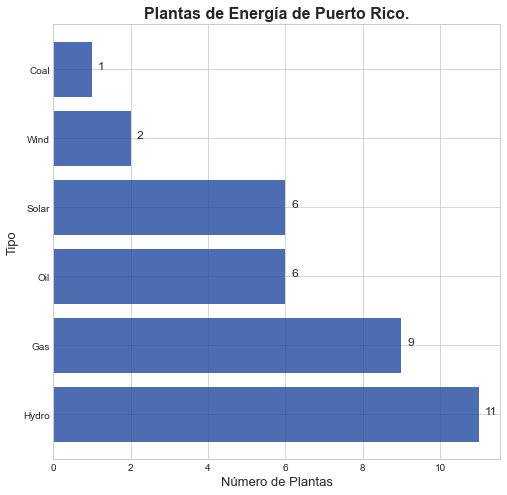

In [1]:
import numpy as np  # útil para muchos cálculos científicos en Python
import pandas as pd # biblioteca de estructura de datos primaria
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.color_palette("colorblind", n_colors=8, desat=.5)
plt.style.use('seaborn-whitegrid')

def set_bar_label(ax_ref, minval=1, orient='h'):
  for p in ax_ref.patches:
    if orient=='h':    
      if p.get_width() >=minval:
        ax_ref.annotate('{}'.format(p.get_width()),xy=(p.get_x()+p.get_width() + 0.15,p.get_y()+ 0.4),fontsize=12)
    else:
      if p.get_height() >=minval:
          ax_ref.annotate('{}'.format(p.get_height()),xy=(p.get_x()+ p.get_width() + 0.15, p.get_y() + p.get_height()),fontsize=12)
#######################

pr = pd.read_csv('gppd_120_pr.csv')

plantas = pr['primary_fuel'].value_counts()

# GRAFICA

plot = plantas.plot(kind='barh', width =0.8, figsize=(8,8),alpha=0.8, color = '#2049A0')

# anotar barras,
_ = set_bar_label(plot)

# establecer una leyenda, título

plt.xlabel('Número de Plantas', size = 13)
plt.ylabel('Tipo', size = 13)
  
plt.title('Plantas de Energía de Puerto Rico.',
          fontweight ="bold", size = 16)

- ¿Cuántos años tienen las plantas de energfa?
Las centrales eléctricas construidas hace décadas tienden a contaminar más ya que no cumplen con los nuevos requisitos anticontaminación. Observe que muchas centrales eléctricas no tienen su fecha de puesta en marcha. Para ello utilice (commissioning_year).

Text(0.5, 1.0, 'Plantas de Energía de Puerto Rico por año de Operación')

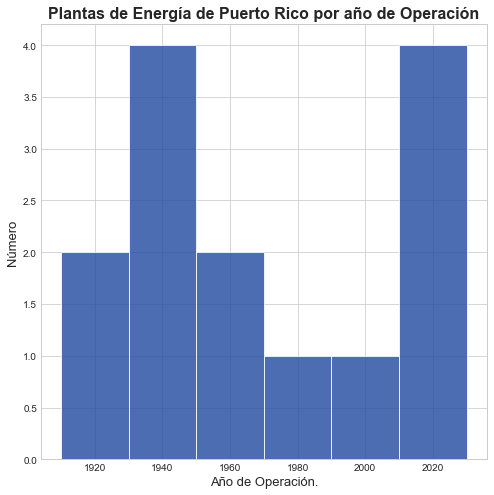

In [2]:
año = pr[pr['commissioning_year'] != 0]['commissioning_year']

# GRAFICA

plot = año.plot(kind='hist', figsize=(8,8), bins = range(1910, 2040, 20), 
                alpha=0.8, ec='white', color = '#2049A0')

# anotar barras,
#_ = set_bar_label(plot)

# establecer una leyenda, título

plt.xlabel('Año de Operación.', size = 13)
plt.ylabel('Número', size = 13)
  
plt.title('Plantas de Energía de Puerto Rico por año de Operación',
          fontweight ="bold", size = 16)

- De acuerdo con la información observada en el dataset, ¿De dónde provienen la mayoría de los datos? (CEPR, PREPA, Sonnedix, Clean Technica, PV Tech, Fluor, TSK, etc.) Para ello utilice (source) y puede elaborar una gráfica de su elección para responder.
¿Quién es el propietario (owner) de las centrales eléctricas?
Elabore una gráfica de barras horizontal para dar su respuesta.

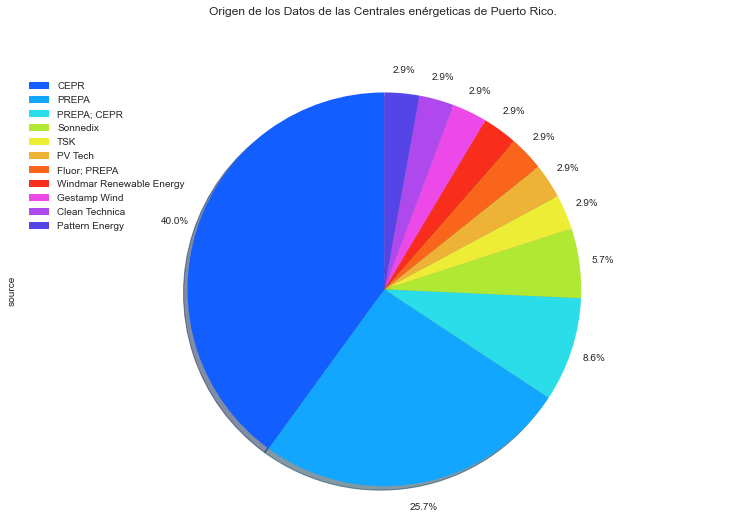

In [3]:
inf = pr['source'].value_counts()

colors_list = ['#125EFF', '#12A6FF', '#2BDCE9', '#B0E834', '#EEED36', '#EEB236', '#F9651B', '#F92D1B', '#ED49E9', '#B049ED', '#5545E7']


# autopct crear %, el ángulo de inicio representa el punto de inicio
inf.plot(kind='pie',
                            figsize=(13, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # desactive las etiquetas en el gráfico circular
                            pctdistance=1.12,    # la relación entre el centro de cada sector circular y el inicio del texto generado por autopct
                            colors=colors_list,  # añadir colores personalizados
                            )

# aumentar el título en un 12% para que coincida con pctdistance
plt.title('Origen de los Datos de las Centrales enérgeticas de Puerto Rico.', y=1.12) 

plt.axis('equal') 

# añadir leyenda
plt.legend(labels=inf.index, loc='upper left') 

plt.show()

Text(0.5, 1.0, 'Dueños de Plantas de Energía de Puerto Rico.')

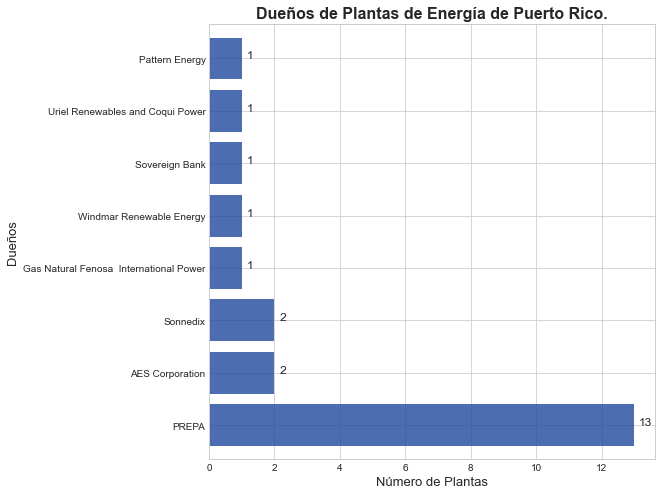

In [4]:
prop = pr['owner'].value_counts()

# GRAFICA

plot = prop.plot(kind='barh', width =0.8, figsize=(8,8),alpha=0.8, color = '#2049A0')

# anotar barras,
_ = set_bar_label(plot)

# establecer una leyenda, título

plt.xlabel('Número de Plantas', size = 13)
plt.ylabel('Dueños', size = 13)
  
plt.title('Dueños de Plantas de Energía de Puerto Rico.',
          fontweight ="bold", size = 16)

Con esto el mayor propietario de las cenrales electricas es PREPA, que es La Autoridad de Energía Eléctrica de Puerto Rico era una compañía de energía eléctrica propiedad del Estado Libre Asociado de Puerto Rico responsable de la generación, distribución y transmisión de energía eléctrica en la isla.

---

Actividad 2
Mencione cuál es la Capacidad Total Instalada (capacity_mw).
La capacidad instalada total de una planta de energía se refiere a la producción máxima de electricidad que puede producir en condiciones ideales, pero esta no será necesariamente la cantidad real de electricidad producida. Por lo general, se expresa en Megavatios (MW)
- Elabore una gráfica de su elección que muestre la Capacidad total de todas las plantas (Oil, Gas, Coal, Solar, Wind, Hydro) y el porcentaje del total que representan.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


7.388854026794434
17.972008883953094
1.7630459740757942
68.33429336547852
2.515267953276634
2.026527002453804


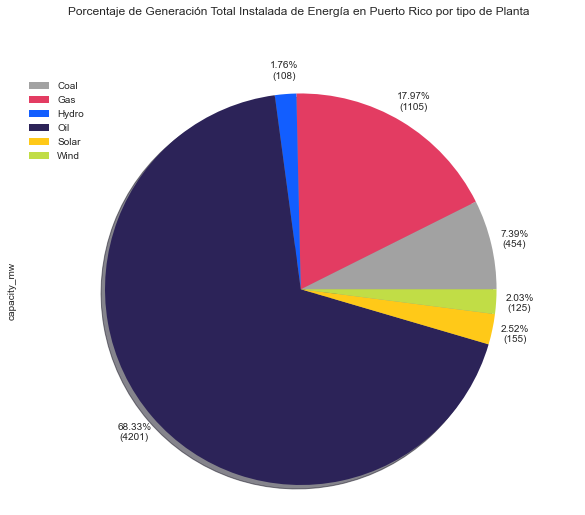

In [5]:
plantas_cap = pr[['primary_fuel', 'capacity_mw']]
plantas_cap = plantas_cap.groupby(['primary_fuel']).sum()

colors_list = ['#A2A2A2', '#E33C62', '#125EFF', '#2C2358', '#FFC918', '#C1DD46']

def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

total = sum(plantas_cap['capacity_mw'])

plantas_cap.plot(kind='pie',
                            figsize=(10, 8),
                            autopct=my_fmt, 
                            startangle=0,    
                            shadow=True,       
                            labels=None,         # desactive las etiquetas en el gráfico circular
                            pctdistance=1.12,    # la relación entre el centro de cada sector circular y el inicio del texto generado por autopct
                            colors=colors_list,  # añadir colores personalizados
                            subplots=True)

# aumentar el título en un 12% para que coincida con pctdistance
plt.title('Porcentaje de Generación Total Instalada de Energía en Puerto Rico por tipo de Planta', y=1.12) 

plt.axis('equal') 

# añadir leyenda
plt.legend(labels=plantas_cap.index, loc='upper left') 

plt.show()

Text(0.5, 1.0, 'Capacidad energética de las Plantas según su tipo')

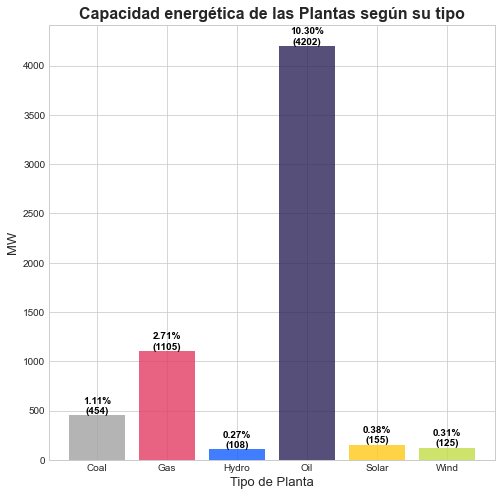

In [59]:
# GRAFICA
fig, ax = plt.subplots()   

plt.rcParams["figure.figsize"] = (10,8)

plot = plt.bar(plantas_cap.index, plantas_cap['capacity_mw'],
                width =0.8,alpha=0.8,
                color = colors_list)

# anotar barras,+


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%\n({:.0f})'.format(height*100/total, height), (x + width/2, y + height + 15), ha='center', color='black', fontweight='bold')
# establecer una leyenda, título

plt.xlabel('Tipo de Planta', size = 13)
plt.ylabel('MW', size = 13)
  
plt.title('Capacidad energética de las Plantas según su tipo',
          fontweight ="bold", size = 16)

- ¿Cuál es la Generación estimada (estimated_generation_gwh) de todas las plantas?

 La generación de electricidad, por otro lado, se refiere a la cantidad de electricidad que se produce durante un período de tiempo específico. Este suele medirse en Kilovatios-hora, Megavatios-hora o Gigavatios-hora.


- Elabore una gráfica de su preferencia que muestre la Generación estimada total de todas las plantas (Oil, Gas, Coal, Solar, Wind, Hydro) y el porcentaje del total que representan.


De acuerdo con su gráfica, qué puede decir sobre la generación estimada que proviene de plantas alimentadas con combustibles fósiles (carbón).

---

Primero, es destacable que el dato de generación de electricidad de la única planta de carbón excede la capacidad de la misma planta, así que se decidió corroborar este dato con el estimado de generación electrica del [Mapa](https://resourcewatch.org/data/explore?section=Discover&selectedCollection=&zoom=7.000482912541634&lat=17.269706892081444&lng=-66.2807871789019&pitch=0&bearing=0&basemap=dark&labels=light&layers=%255B%257B%2522dataset%2522%253A%2522a86d906d-9862-4783-9e30-cdb68cd808b8%2522%252C%2522opacity%2522%253A1%252C%2522layer%2522%253A%25222a694289-fec9-4bfe-a6d2-56c3864ec349%2522%257D%255D&aoi=&page=1&sort=most-viewed&sortDirection=-1), en este se puede verificar que el valor real de producción energética de esta planta, es 100 veces mayor, así que se hace un reajuste.

/var/folders/7n/jy1_ycd91snbbhld0x37jht80000gn/T/ipykernel_33034/3890001347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plantas_gen['estimated_generation_gwh'][28] = 450562.692350/100
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


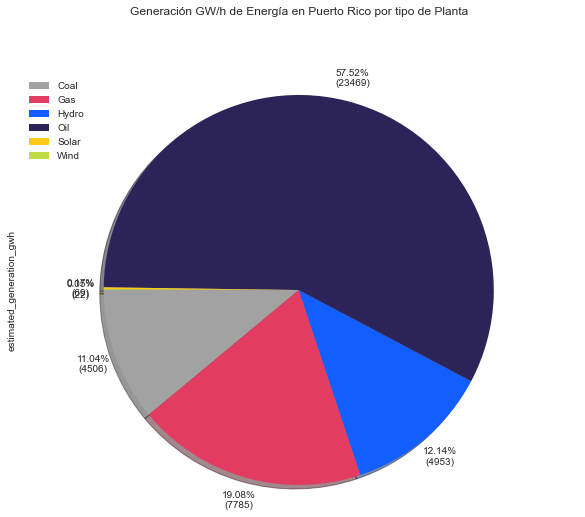

In [7]:
plantas_gen = pr[['primary_fuel', 'estimated_generation_gwh']]
plantas_gen['estimated_generation_gwh'][28] = 450562.692350/100
plantas_gen = plantas_gen.groupby(['primary_fuel']).sum()

colors_list = ['#A2A2A2', '#E33C62', '#125EFF', '#2C2358', '#FFC918', '#C1DD46']

def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

total = sum(plantas_gen['estimated_generation_gwh'])

plantas_gen.plot(kind='pie',
                            figsize=(10, 8),
                            autopct=my_fmt, 
                            startangle=180,    
                            shadow=True,       
                            labels=None,         # desactive las etiquetas en el gráfico circular
                            pctdistance=1.12,    # la relación entre el centro de cada sector circular y el inicio del texto generado por autopct
                            colors=colors_list,  # añadir colores personalizados
                            subplots=True)

# aumentar el título en un 12% para que coincida con pctdistance
plt.title('Generación GW/h de Energía en Puerto Rico por tipo de Planta', y=1.12) 

plt.axis('equal') 

# añadir leyenda
plt.legend(labels=plantas_cap.index, loc='upper left') 

plt.show()

Text(0.5, 1.0, 'Generación energética GW/h de las Plantas según su tipo')

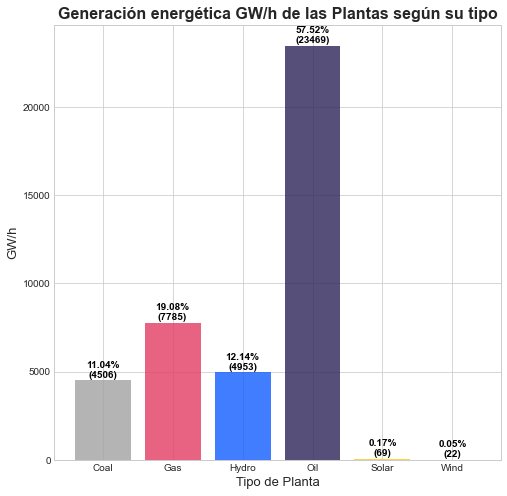

In [9]:
# GRAFICA
fig, ax = plt.subplots()   

plt.rcParams["figure.figsize"] = (8,8)

plot = plt.bar(plantas_gen.index, plantas_gen['estimated_generation_gwh'],
                width =0.8,alpha=0.8,
                color = colors_list)

# anotar barras,

total = sum(plantas_gen['estimated_generation_gwh'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%\n({:.0f})'.format(height*100/total, height), (x + width/2, y + height + 150), ha='center', color='black', fontweight='bold')

#autolabel(plot)
# establecer una leyenda, título

plt.xlabel('Tipo de Planta', size = 13)
plt.ylabel('GW/h', size = 13)
  
plt.title('Generación energética GW/h de las Plantas según su tipo',
          fontweight ="bold", size = 16)

Lo más descatable es que más de la mitad de la producción energética de la isla es derivada del petróleo. Seguido del gas Natural, Plantas Hidroelectricas, y Carbón. Es decir, que 3 de las 4 principales fuentes de energía contaminantes, y por otro lado las energías limpias no suman ni el 15%. Un contraste interesante si consideramos que Puerto Rico es parte de los Estados Unidos, que es un país que se ha esforzado por construir plantas de energía renvable en los últimos años con el fin de acelerar su transición.

---

### Actividad 3

Vista geográfica de las distintas Centrales Eléctricas.
Podemos usar el conjunto de datos de la planta de energía para visualizar las ubicaciones existentes de las distintas plantas de energía. Para ello considere la información que se presenta en:
https://datasets.wri.org/dataset/globalpowerplantdatabase
- Vaya a la Liga Resource Watch y muestre una vista geográfica de las centrales de energía en Puerto Rico.
- También considere el caso de México y otro país de su preferencia.

In [10]:
plantas = pd.read_csv('global_power_plant_database.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Puerto Rico

La base de datos de las plantas en Puerto Rico estan dentro de la base para los Estados Unidos. Así que vamos a hacer la selección a partir de coordenadas de delimitación, lo cual es simple dado que puerto Rico es una Isla:

Sup: 18.613559,-67.372925
Inf: 17.776677,-65.140786

In [16]:
PR =  plantas[plantas['country'] == 'USA'][['latitude', 'longitude']]
PR = PR[(PR['latitude'] < 18.613559) & (PR['latitude'] > 17.776677)]

In [19]:
!pip install folium
import folium

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [31]:
# Defina el mapa mundial centrado alrededor de Canadá con un nivel de zoom bajo
world_map = folium.Map(location=[18.210446,-66.515258], zoom_start=8)

locationlist = PR.values.tolist()

for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], radius=2).add_to(world_map)
map
# Mostrar el mapa del mundo
world_map

#### México

In [41]:
MX =  plantas[plantas['country'] == 'MEX'][['latitude', 'longitude']]

In [58]:
# Defina el mapa mundial centrado alrededor de Canadá con un nivel de zoom bajo
world_map = folium.Map(location=[21.123721,-100.610284], zoom_start=4)

locationlist = MX.values.tolist()

for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], radius=2).add_to(world_map)
map
# Mostrar el mapa del mundo
world_map

#### Alemania

In [52]:
GER =  plantas[plantas['country'] == 'DEU'][['latitude', 'longitude']]

In [57]:
# Defina el mapa mundial centrado alrededor de Canadá con un nivel de zoom bajo
world_map = folium.Map(location=[50.923979,10.405607], zoom_start=5)

locationlist = GER.values.tolist()

for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], radius=2).add_to(world_map)
map
# Mostrar el mapa del mundo
world_map